In [37]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from nltk.corpus import stopwords
import string
import numpy as np
import nltk
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cross_validation import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
import unicodedata 
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud 
from nltk.corpus import stopwords
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

In [15]:
#import data 

df = pd.read_csv("train.tsv",sep='\t' , encoding='utf-8' )
df_test =  pd.read_csv("test.tsv",sep='\t' , encoding='utf-8' )
df.drop(["PhraseId","SentenceId"],axis=1,inplace=True) # remove useless columns
df_test.drop(["PhraseId","SentenceId"],axis=1,inplace=True) # remove useless columns

df.shape

(156060, 2)

In [5]:
def noun_count (str):
    words_len = len(str)
    return words_len
df['Phrase'].apply(noun_count).sum()




6276300

In [12]:
a = list()
aa = df['Phrase'].str.lower().str.split()
aaa = list(aa)



In [22]:
txt = df.Phrase.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

In [3]:
txt = df.Phrase.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
wordss = nltk.tokenize.word_tokenize(txt)


In [21]:
len(wordss)

1124613

In [42]:
wn.synsets('small')

[Synset('small.n.01'),
 Synset('small.n.02'),
 Synset('small.a.01'),
 Synset('minor.s.10'),
 Synset('little.s.03'),
 Synset('small.s.04'),
 Synset('humble.s.01'),
 Synset('little.s.07'),
 Synset('little.s.05'),
 Synset('small.s.08'),
 Synset('modest.s.02'),
 Synset('belittled.s.01'),
 Synset('small.r.01')]

In [62]:
import enchant
b = []
d = enchant.Dict("en_US")
for word in wordss:
    if d.check(w):
        b.append(word)
        

In [66]:
len(c)

710553

In [65]:
stop = stopwords.words('english')
c = []
for w in b:

    if w not in stop:
        c.append(w)
        

In [32]:
stop = stopwords.words('english')
a = []
for w in wordss:

    if w in stop:
        a.append(w)
        
   

In [34]:
len(a)

414060

In [29]:

count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))

a_chars =  count(words, string.ascii_letters)
a_punct = count(words, string.punctuation)

In [30]:
a_chars

40467

In [31]:
a_punct

67553

All frequencies, including STOPWORDS:
     Word  Frequency
0     the      51220
1       ,      42006
2       a      36123
3      of      32308
4     and      31763
5      to      22448
6       .      17865
7      's      16971
8      in      13745
9      is      13447
10   that      12327
11     it      11677
12     as       8623
13   with       7750
14    for       7417
15    its       7051
16   film       6689
17     an       6479
18  movie       5905
19   this       5677
20    but       5126
21     be       4977
22    you       4827
23     on       4730
24    n't       3970
25     by       3918
26   more       3888
27    his       3827
28  about       3682
29    one       3609


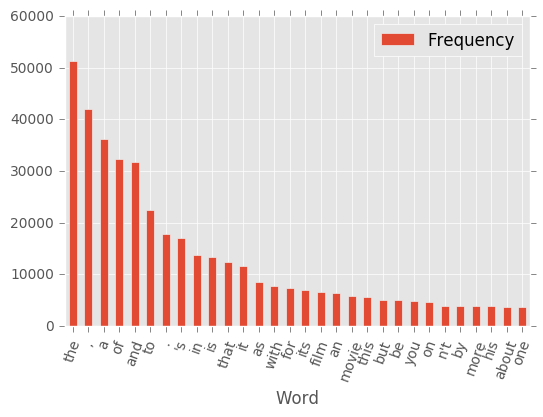

In [83]:
txt = df.Phrase.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

top_N = 30
print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

plt.style.use('ggplot')

rslt.plot.bar(rot=70)
plt.show()

All frequencies, including STOPWORDS:
          Word  Frequency
0            ,      42006
1            .      17865
2           's      16971
3         film       6689
4        movie       5905
5          n't       3970
6          one       3609
7           --       3356
8         like       3071
9            '       2917
10       story       2520
11       -rrb-       2438
12       -lrb-       2098
13        good       2043
14           `       1906
15         ...       1884
16  characters       1882
17        much       1862
18          ``       1840
19          ''       1832


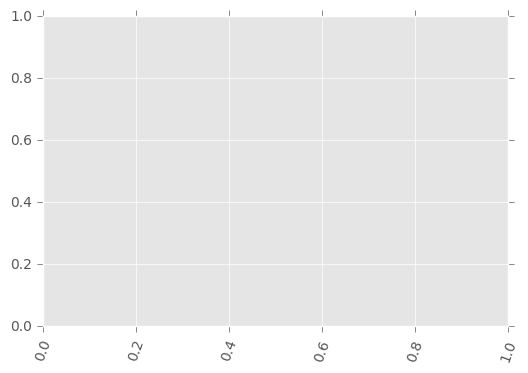

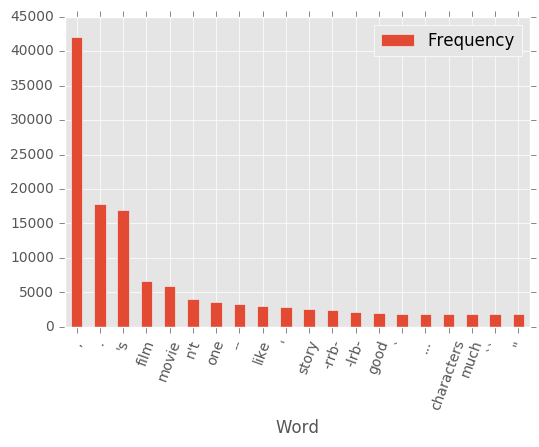

In [81]:
txt = df.Phrase.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

top_N = 20
print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')


plt.xticks(rotation=70)
rslt.plot.bar(rot=70)

plt.show()

In [4]:
df.Sentiment.unique()

array([1, 2, 3, 4, 0])

In [5]:
df.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


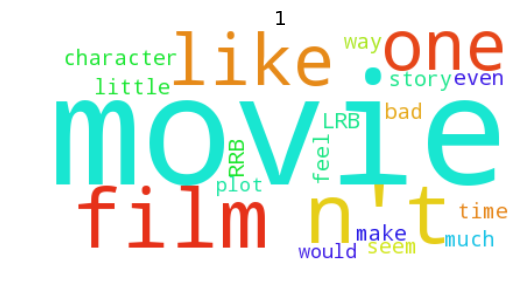

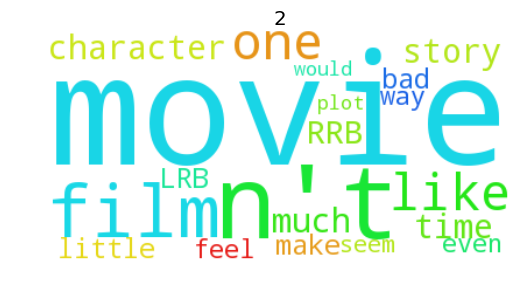

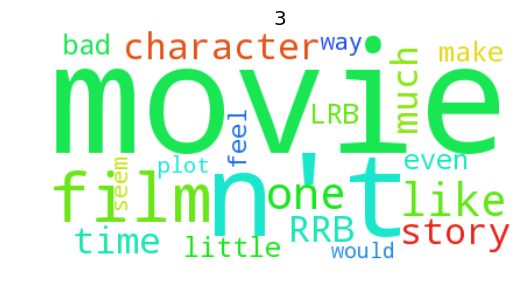

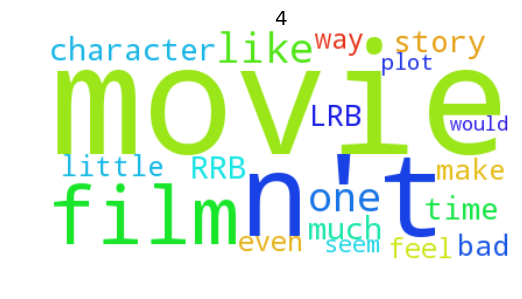

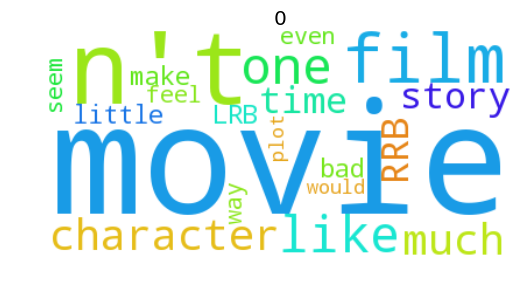

In [62]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
range = [1,2,3,4,0]
cloud = WordCloud(background_color="white", max_words=20, stopwords=stopwords.words('english'))
for i in range: 
    positive_cloud = cloud.generate(df.loc[df.Sentiment == 1, 'Phrase'].str.cat(sep='\n'))
    plt.figure()
    plt.imshow(positive_cloud)
    plt.axis("off")
    plt.title(i)
    plt.show()

In [63]:
# Transformer des caractères spéciaux en ASCII + maj to minuscules ( sorte de normalisation)
df['Phrase'] = (df['Phrase'].str.lower()
              .str.decode('utf-8')
              .map(lambda x: unicodedata.normalize('NFKD', x))
              .str.encode('ascii', 'ignore'))



 1) Remove punctuation marks and transform all characters to lowercase using nlk library 2) Remove stop words 3) Steaming

Sans oublier la segmentation afin de separer chaque phrase en mot l idée c que chaque mot dans une phrase va être consideré comme étant un feature
and finally tfidf

In [64]:
#stop words
stop = stopwords.words('english')
stop.extend(['will','now','today','movie','serie','series','story','film'])

# remove punctionation

def remove_punctuation(s):
    s = ''.join([i for i in s if i not in set(string.punctuation)])
    return s

df['Phrase'] = df['Phrase'].apply(remove_punctuation)
#stemming
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
#lemmatisation
lmtzr = WordNetLemmatizer()
def lem_tokens(tokens, lmtzr):
    tokked = []
    for item in tokens:
        tokked.append(lmtzr.lemmatize(item))
    return tokked

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    tokens = lem_tokens (stems,lmtzr)
    return stems

In [150]:
#df['Phrase'] = df['Phrase'].apply(tokenize)

In [151]:
#df['Phrase'] = df['Phrase'].apply(lambda x: [item for item in x if item not in stop])

In [121]:
#delete empty rows

#df['Phrase'] = df[df.Phrase.map(lambda x: len(x) if isinstance(x, list) else None) != 0]
#df = df.dropna()

In [152]:
#transform a list to one string

#df['Phrase'] = df.Phrase.map(lambda x: ' '.join(x))

In [124]:
#remove duplicates rows because after pre-processing we get same occurences

#df = df.drop_duplicates()

In [65]:
# we can improve it with changing parameters and add other parametrs 
# for example ngrams 
# max_df , min_df  and max_feature
#,ngram_range = (1,2)
vect = TfidfVectorizer(min_df=5,sublinear_tf=True, analyzer='word', stop_words=stop, tokenizer=tokenize , strip_accents = 'ascii',  max_df = 0.8 )

In [66]:
#  it takes time
transform = vect.fit_transform(df.pop('Phrase'))

In [11]:
# save it because it takes time in order to execute the same operation each time
import pickle
pickle.dump(transform, open("vectorizer.pickle", "wb"))

In [12]:
X = pickle.load(open(("vectorizer.pickle"), "rb"))

In [13]:
#sparse matrix to datframe here i used a loop because the memory of my computer does not suppert #to transfor matrix to dataframe en un seul coup that why it take time 
for i, col in enumerate(vect.get_feature_names()):
    df[col] = pd.SparseSeries(X[:, i].toarray().reshape(-1,), fill_value=0)

In [16]:
df.shape

(50000, 5989)

In [19]:
for i, col in enumerate(vect.get_feature_names()):
    df_test[col] = pd.SparseSeries(X[:, i].toarray().reshape(-1,), fill_value=0)

In [14]:
#test if there are any NaN
print(df.isnull().values.sum().sum())


0


In [15]:
df.isnull().values.any()

False

In [17]:
data_frame = df.values
train = data_frame[:,1:]
label = data_frame[:,0]

In [19]:
#label = df.Sentiment
#train= df.drop('Sentiment', axis=1)

In [18]:
#with k = 5000 the number of feature ( not sure if it correct or not)
fselect = SelectKBest(chi2, k=3000)
fit = fselect.fit(train, label)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[ 0.881  3.797  0.881 ...,  3.797  1.762  1.762]


In [56]:
#pipline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# create pipeline
estimators = []

estimators.append(('features', SelectKBest(chi2)))
estimators.append(('classif',  RandomForestClassifier()))

model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=5, random_state=seed)
results = cross_val_score(model, train, label, cv=kfold)
print(results.mean())


0.53302


In [ ]:
#pipline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.grid_search

# create pipeline
estimators = []

estimators.append(('features', SelectKBest(chi2)))
estimators.append(('classif', RandomForestClassifier()))

model = Pipeline(estimators)
# evaluate pipeline
parameters = dict(features__k=[100, 1000,2000,3000,4000], 
              classif__n_estimators=[10,20,30,40,50])
                  
cv = sklearn.grid_search.GridSearchCV(model, param_grid=parameters)
cv.fit(train,label)


In [47]:
# View the accuracy score
print('Best score for data1:', cv.best_score_)
# View the best parameters for the model found using grid search
#print('Best C:',cv.featurC)
print('best parameters:',cv.best_params_)


('Best score for data1:', 0.5336)


AttributeError: 'Pipeline' object has no attribute 'C'

In [46]:
df.head()

,Sentiment,1,10,100,10000,100minut,100year,101,102minut,103minut,...,zish,ziyi,zoe,zombi,zombieland,zone,zooland,zucker,zwick,zzzzzzzzz
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [107]:
#validation for svm
#there are an error to check it ( grid search ne marche pas i will check why after)
label = df.Sentiment
train= df.drop('Sentiment', axis=1)


from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                      ('clf', LinearSVC()),
 ])
from sklearn.model_selection import GridSearchCV
parameters = {'tfidf_min_df': [[0.8, 1.0], 1],
               'tfidf__max_df': ([0.8, 1.0], 1),
               'clf__c': (0.1, 1 , 10),
 }
gs_clf = GridSearchCV(text_clf, parameters)
gs_clf = gs_clf.fit(train.as_matrix(), label)





MemoryError: 

In [105]:
label = df['Sentiment'].values
train= df.drop('Sentiment', axis=1)
classif = SklearnClassifier(LinearSVC())
# Séparation du set de train et de test
X_train,X_test,y_train,y_test = train_test_split(train.as_matrix(),label, test_size = 0.33)


MemoryError: 

In [ ]:
#grid search to find the best parameters


In [ ]:
#pd.SparseDataFrame(X.todense(), columns=vect.get_feature_names(), index=df.index) 

In [253]:
#X = vect.fit_transform(df.pop('Phrase'))
#X = vect.fit_transform(df.pop('Phrase')).toarray()

#for i, col in enumerate(vect.get_feature_names()):
    #df[col] = X[:, i]

In [90]:
#r = df[['Sentiment']].copy()
#del df
#d = pd.DataFrame(X.toarray(), columns=vect.get_feature_names(), iterator=True, chunksize=10)

#d = pd.DataFrame(X, columns=vect.get_feature_names())
#del X
#del vect



In [91]:
#d.head()